In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

# Load Data

In [2]:
train_data_path = "/content/drive/MyDrive/horse-or-human/train"
validation_data_path = "/content/drive/MyDrive/horse-or-human/validation"

# Data Preprocessing

In [3]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip = True,
                                      fill_mode = 'nearest'   
                                      )

In [4]:
training_data = training_datagen.flow_from_directory(train_data_path,
                                     target_size=(150,150),
                                     batch_size=32,
                                     class_mode='binary')

Found 1029 images belonging to 2 classes.


In [5]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [6]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                     target_size=(150,150),
                                     batch_size=32,
                                     class_mode='binary')

Found 256 images belonging to 2 classes.


In [8]:
# to see the images
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  
  plt.tight_layout()
  plt.show()

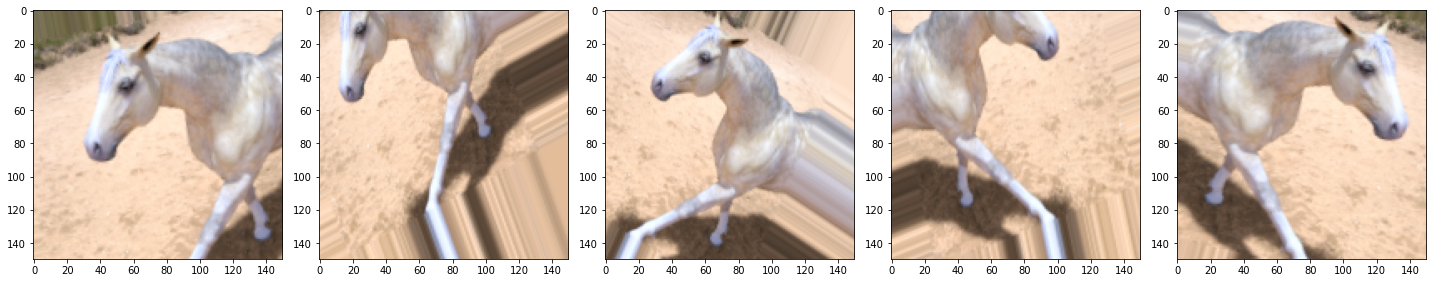

In [9]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

# Building the model

In [10]:
# Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
 

In [11]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_path = '/content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=20, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/20
33/33 [==============================] - 726s 22s/step - loss: 0.7170 - accuracy: 0.5073 - val_loss: 0.6893 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5
Epoch 2/20
33/33 [==============================] - 14s 413ms/step - loss: 0.6718 - accuracy: 0.5726 - val_loss: 0.5856 - val_accuracy: 0.6328

Epoch 00002: val_accuracy improved from 0.50000 to 0.63281, saving model to /content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5
Epoch 3/20
33/33 [==============================] - 14s 421ms/step - loss: 0.6109 - accuracy: 0.6761 - val_loss: 0.7439 - val_accuracy: 0.5547

Epoch 00003: val_accuracy did not improve from 0.63281
Epoch 4/20
33/33 [==============================] - 13s 406ms/step - loss: 0.5433 - accuracy: 0.7365 - val_loss: 1.0443 - val_accuracy: 0.5547

Epoch 00004: val_accuracy did not improve from 0.63281
Epoch 5/20
33/33 [================

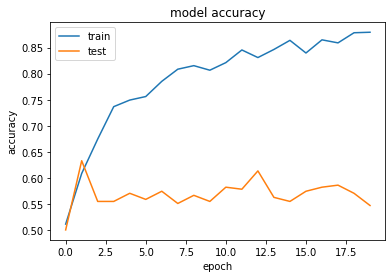

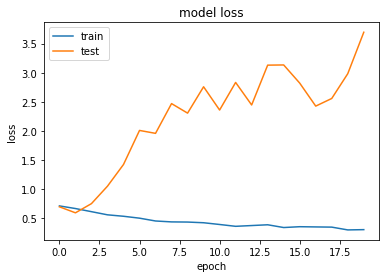

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()